<a href="https://colab.research.google.com/github/wesleymartins95/AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturameto_total_lojas = {}
faturameto_total_lojas["loja1","loja2","loja3","loja4"]=  [loja['Preço'].sum(),loja2['Preço'].sum(),loja3['Preço'].sum(),loja4['Preço'].sum()]
faturameto_total_lojas

{('loja1', 'loja2', 'loja3', 'loja4'): [np.float64(1534509.12),
  np.float64(1488459.06),
  np.float64(1464025.03),
  np.float64(1384497.58)]}

In [3]:
import numpy as np

# Criando um dicionário com os dados
dados = {
    "loja1": [np.float64(1534509.12)],
    "loja2": [np.float64(1488459.06)],
    "loja3": [np.float64(1464025.03)],
    "loja4": [np.float64(1384497.58)]
}

# Convertendo para um DataFrame
df = pd.DataFrame(dados)

# Exibindo a tabela
print(df)


        loja1       loja2       loja3       loja4
0  1534509.12  1488459.06  1464025.03  1384497.58


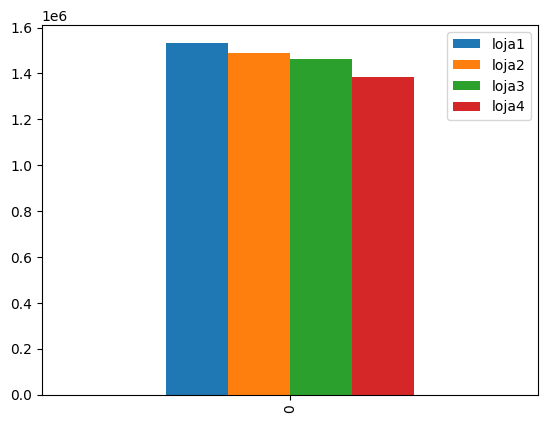

In [4]:
import matplotlib.pyplot as plt
df.plot.bar()
plt.show()

A loja que possui mais faturamento é a Loja1 e a de menor faturamento é a loja4.

# 2. Vendas por Categoria


In [21]:
Lojas_venda_categoria = {}
# somando e agrupando por categoria de cada loja.
Lojas_venda_categoria["loja1"] = loja.groupby('Categoria do Produto')['Preço'].sum()
Lojas_venda_categoria["loja2"] = loja2.groupby('Categoria do Produto')['Preço'].sum()
Lojas_venda_categoria["loja3"] = loja3.groupby('Categoria do Produto')['Preço'].sum()
Lojas_venda_categoria["loja4"] = loja4.groupby('Categoria do Produto')['Preço'].sum()
df_venda_categoria = pd.DataFrame(Lojas_venda_categoria)
for nome_loja in df_venda_categoria.columns:
    # Ordenando as categorias por vendas para cada loja
    top_3_categorias = df_venda_categoria.sort_values(by=nome_loja, ascending=False).head(3)

    # Exibindo os resultados para cada loja
    print(f"Top 3 categorias mais vendidas na {nome_loja}:\n")
    print(top_3_categorias[[nome_loja]])  # Mostrando apenas a coluna da loja atual
    print("\n")

Top 3 categorias mais vendidas na loja1:

                          loja1
Categoria do Produto           
eletronicos           572659.23
eletrodomesticos      484913.36
moveis                250178.11


Top 3 categorias mais vendidas na loja2:

                          loja2
Categoria do Produto           
eletronicos           547773.71
eletrodomesticos      464758.13
moveis                235234.68


Top 3 categorias mais vendidas na loja3:

                          loja3
Categoria do Produto           
eletronicos           547699.92
eletrodomesticos      438984.89
moveis                268095.56


Top 3 categorias mais vendidas na loja4:

                          loja4
Categoria do Produto           
eletronicos           545966.86
eletrodomesticos      377680.65
moveis                256705.65




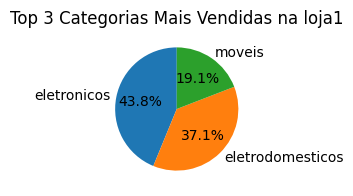

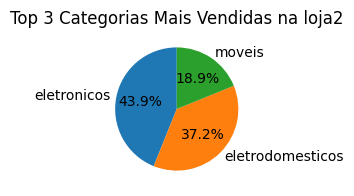

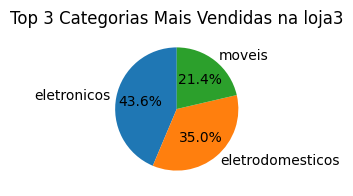

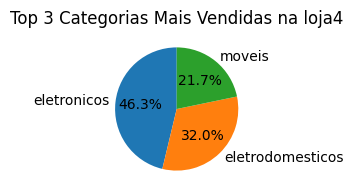

In [35]:
import matplotlib.pyplot as plt

for nome_loja in df_venda_categoria.columns:
    # Ordenando as categorias por vendas para cada loja
    top_3_categorias = df_venda_categoria.sort_values(by=nome_loja, ascending=False).head(3)

    # Criando o gráfico de pizza para a loja atual
    plt.figure(figsize=(2, 2))  # Define o tamanho da figura
    plt.pie(top_3_categorias[nome_loja], labels=top_3_categorias.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Top 3 Categorias Mais Vendidas na {nome_loja}")
    plt.show()

Podemos ver que em todas as lojas a categoria eletronicos é a que possui mais vendas.

# 3. Média de Avaliação das Lojas

In [7]:
# Criando dicionário com médias de avaliação
Lojas_media_venda = {
    "loja1": loja['Avaliação da compra'].mean(),
    "loja2": loja2['Avaliação da compra'].mean(),
    "loja3": loja3['Avaliação da compra'].mean(),
    "loja4": loja4['Avaliação da compra'].mean()
}

# Convertendo para DataFrame
df_media_venda = pd.DataFrame(Lojas_media_venda.items(), columns=["Loja", "Média Avaliação"])

# Ordenando do maior para o menor
df_media_venda = df_media_venda.sort_values(by="Média Avaliação", ascending=False)

# Exibindo a tabela
print(df_media_venda)



    Loja  Média Avaliação
2  loja3         4.048326
1  loja2         4.037304
3  loja4         3.995759
0  loja1         3.976685


A loja que possui maior média de avaliações é a 3.

# 4. Produtos Mais e Menos Vendidos

In [9]:
Lojas_produtos_vendas = {}
# somando e agrupando por categoria de cada loja.
Lojas_produtos_vendas["loja1"] = loja['Produto'].value_counts()
Lojas_produtos_vendas["loja2"] = loja2['Produto'].value_counts()
Lojas_produtos_vendas["loja3"] = loja3['Produto'].value_counts()
Lojas_produtos_vendas["loja4"] = loja4['Produto'].value_counts()
Lojas_produtos_vendas

{'loja1': Produto
 Micro-ondas                    60
 TV Led UHD 4K                  60
 Guarda roupas                  60
 Secadora de roupas             58
 Cômoda                         56
 Blocos de montar               56
 Bola de basquete               55
 Bicicleta                      54
 Copo térmico                   54
 Geladeira                      54
 Impressora                     54
 Bateria                        53
 Faqueiro                       52
 Carrinho controle remoto       52
 Modelagem preditiva            51
 Fone de ouvido                 50
 Xadrez de madeira              49
 Celular Plus X42               49
 Lava louças                    48
 Lavadora de roupas             47
 Guitarra                       47
 Violão                         46
 Sofá retrátil                  46
 Cadeira de escritório          46
 Fogão                          45
 Cama box                       44
 Kit banquetas                  44
 Smart TV                       44
 C

In [22]:
for nome_loja, produtos_vendidos in Lojas_produtos_vendas.items():
    # Encontrando o produto mais vendido,o idxmax() retorna o índice do maior valor no dataframe.
    produto_mais_vendido = produtos_vendidos.idxmax()
    # Encontrando o produto menos vendido
    produto_menos_vendido = produtos_vendidos.idxmin()

    print(f"Na {nome_loja}:")
    print(f"  - Produto mais vendido: {produto_mais_vendido} ({produtos_vendidos[produto_mais_vendido]} vendas)")
    print(f"  - Produto menos vendido: {produto_menos_vendido} ({produtos_vendidos[produto_menos_vendido]} vendas)")
    print("\n")

Na loja1:
  - Produto mais vendido: Micro-ondas (60 vendas)
  - Produto menos vendido: Headset (33 vendas)


Na loja2:
  - Produto mais vendido: Iniciando em programação (65 vendas)
  - Produto menos vendido: Jogo de tabuleiro (32 vendas)


Na loja3:
  - Produto mais vendido: Kit banquetas (57 vendas)
  - Produto menos vendido: Blocos de montar (35 vendas)


Na loja4:
  - Produto mais vendido: Cama box (62 vendas)
  - Produto menos vendido: Guitarra (33 vendas)




# 5. Frete Médio por Loja


In [26]:
# Criando dicionário com frete médias
Lojas_frete_medio = {
    "loja1": loja['Frete'].mean(),
    "loja2": loja2['Frete'].mean(),
    "loja3": loja3['Frete'].mean(),
    "loja4": loja4['Frete'].mean()
}

# Convertendo para DataFrame
df_frete_medio = pd.DataFrame(Lojas_frete_medio.items(), columns=["Loja", "Frete Médio"])

# Ordenando do maior para o menor
df_frete_medio = df_frete_medio.sort_values(by="Frete Médio", ascending=False)

# Exibindo a tabela
print(df_frete_medio)


    Loja  Frete Médio
0  loja1    34.691805
1  loja2    33.621941
2  loja3    33.074464
3  loja4    31.278997


Loja1 possui o maior frete.

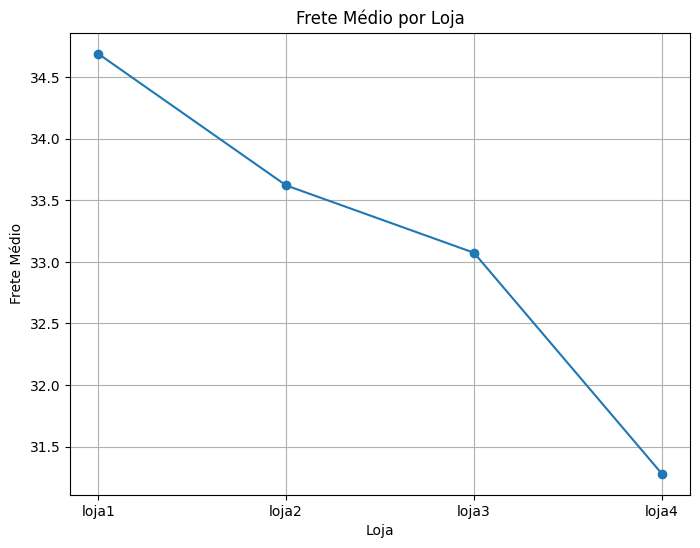

In [39]:
import matplotlib.pyplot as plt

     # Criando o gráfico de linhas
plt.figure(figsize=(8, 6))
plt.plot(df_frete_medio["Loja"], df_frete_medio["Frete Médio"], marker='o', linestyle='-')
plt.xlabel("Loja")
plt.ylabel("Frete Médio")
plt.title("Frete Médio por Loja")
plt.grid(True)  # Adicionando grid para melhor visualização
plt.show()

# RELATÒRIO

Com base na análise dos indicadores, a Loja 4 apresenta resultados inferiores:

* Faturamento: É o menor entre as lojas, sugerindo menor receita.

* Vendas por Categoria: Mesmo tendo o mesmo ranking de categorias, os valores agregados são inferiores em comparação com os demais estabelecimentos.

* Avaliações de Clientes: A média de avaliação da Loja 4 é menor que a das Lojas 2 e 3, o que pode indicar insatisfação do consumidor.

* Desempenho dos Produtos: Apesar de seu produto mais vendido ter um bom número de vendas, o resultado geral reforça o baixo desempenho.

* Frete Médio: O menor valor de frete é da Loja 4 tendo uma operação menos rentável.

Dessa forma, recomenda-se que o Senhor Joãoa venda a Loja 4.

